<a href="https://www.kaggle.com/code/okolinnamdinnaemeka/ipl-analysis?scriptVersionId=150254579" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-premier-league-ipl-dataset/matches.csv
/kaggle/input/indian-premier-league-ipl-dataset/deliveries.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from collections import Counter

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Importing data

In [3]:
df = pd.read_csv(r'../input/indian-premier-league-ipl-dataset/matches.csv')
match_df = df.copy()

In [4]:
data = pd.read_csv(r'../input/indian-premier-league-ipl-dataset/deliveries.csv')
batting_data = data.copy()

In [5]:
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [6]:
match_df.shape[0] # Total matches played across all seasons

756

In [7]:
match_df['venue'].unique() # venue matches are played

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [8]:
match_df['city'].unique() # cities matches were played

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [9]:
match_df['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: count, dtype: int64

# in-depth analysis of Batsman performance

In [10]:
batting_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [11]:
batting_data['batsman'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [12]:
filt = batting_data['batsman']=='MC Henriques'
df_Henriques = batting_data[filt]
df_Henriques.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
12,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,6,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
13,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
15,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,2,MC Henriques,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
16,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,3,MC Henriques,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
17,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,4,MC Henriques,S Dhawan,TS Mills,0,...,0,0,0,0,3,0,3,NaN,NaN,NaN


In [13]:
df_Henriques['dismissal_kind'].value_counts()

dismissal_kind
caught               20
stumped               4
bowled                4
caught and bowled     3
run out               2
lbw                   2
Name: count, dtype: int64

In [14]:
print(len(df_Henriques[df_Henriques['batsman_runs']==1])*1)
print(len(df_Henriques[df_Henriques['batsman_runs']==2])*2)
print(len(df_Henriques[df_Henriques['batsman_runs']==3])*3)
print(len(df_Henriques[df_Henriques['batsman_runs']==4])*4)
print(len(df_Henriques[df_Henriques['batsman_runs']==6])*6)

310
140
9
348
162


In [15]:
values = [310 , 140, 9,346 , 162]
labels = [1,2,3,4,6]

trace = go.Pie(labels = labels, values = values, hole = 0.3)

data = [trace]

Fig= go.Figure(data = data)


Fig.show()

# Toss decision across seasons

In [16]:
match_df['date']= pd.to_datetime(match_df['date'], format="mixed")
match_df['Season'] = pd.to_datetime(match_df['date']).dt.year

match_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'Season'],
      dtype='object')

In [17]:
match_df.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Season
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017


In [18]:
match_df.groupby(['Season' , 'toss_decision']).size()
toss_count = match_df.groupby(['Season' , 'toss_decision']).size().reset_index().rename(columns= {0 : 'count'})
toss_count

,Season,toss_decision,count
0,2008,bat,26
1,2008,field,32
2,2009,bat,35
3,2009,field,22
4,2010,bat,39
5,2010,field,21
6,2011,bat,25
7,2011,field,48
8,2012,bat,37
9,2012,field,37


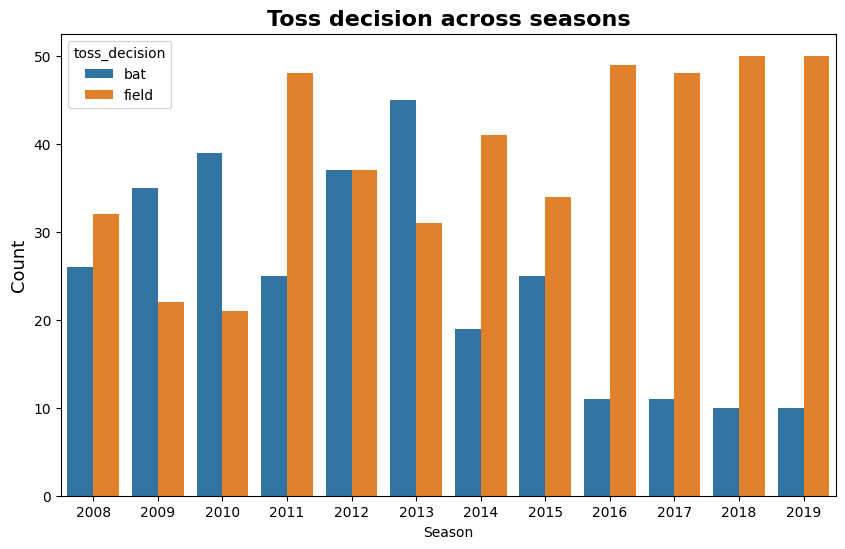

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Season' , y ='count' , hue = 'toss_decision', data = toss_count)
plt.title("Toss decision across seasons", fontsize = 16, fontweight = "bold")
plt.ylabel("Season", fontsize = 13)
plt.ylabel("Count", fontsize = 13)
plt.show()

# Analysing if winning toss implies wining game or not

In [20]:
match_df[['team1','team2','toss_winner', 'winner' ]]

,team1,team2,toss_winner,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore
...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,Mumbai Indians
753,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,Delhi Capitals
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings


In [21]:
match_df['toss_win_game_win']=np.where(match_df['toss_winner']==match_df['winner'] , 'Yes' , 'No')
match_df.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Season,toss_win_game_win
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017,No
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017,Yes


In [22]:
match_df['toss_win_game_win'].value_counts()

toss_win_game_win
Yes    393
No     363
Name: count, dtype: int64

In [23]:
match_df['toss_win_game_win'].value_counts().index

Index(['Yes', 'No'], dtype='object', name='toss_win_game_win')

In [24]:
match_df['toss_win_game_win'].value_counts().values

array([393, 363])

In [25]:
labels = match_df['toss_win_game_win'].value_counts().index
values = match_df['toss_win_game_win'].value_counts().values

trace = go.Pie(labels = labels, values = values, hole = 0.3)

data = [trace]

Fig= go.Figure(data = data)

Fig.update_traces(hoverinfo = 'label+percent', textinfo = 'label+percent')

# Team that won the tournament most

In [26]:
match_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'Season', 'toss_win_game_win'],
      dtype='object')

In [27]:
match_df['Season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int32)

In [28]:
df_2018= match_df[match_df['Season']==2018]
df_2018

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Season,toss_win_game_win
636,7894,2018,Mumbai,2018-07-04,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary,2018,Yes
637,7895,2018,Mohali,2018-08-04,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon,2018,Yes
638,7896,2018,Kolkata,2018-08-04,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi,2018,Yes
639,7897,2018,Hyderabad,2018-09-04,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan,2018,Yes
640,7898,2018,Chennai,2018-10-04,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore,2018,Yes
641,7899,2018,Jaipur,2018-11-04,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,1,Rajasthan Royals,10,0,SV Samson,Sawai Mansingh Stadium,K Ananthapadmanabhan,Rod Tucker,Nitin Menon,2018,No
642,7900,2018,Hyderabad,2018-12-04,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,1,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",O Nandan,Nigel Llong,Vineet Kulkarni,2018,Yes
643,7901,2018,Bengaluru,2018-04-13,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,UT Yadav,M Chinnaswamy Stadium,S Ravi,A.D Deshmukh,C Shamshuddin,2018,Yes
644,7902,2018,Mumbai,2018-04-14,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,7,JJ Roy,Wankhede Stadium,K Ananthapadmanabhan,Nitin Menon,Rod Tucker,2018,Yes
645,7903,2018,Kolkata,2018-04-14,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,5,B Stanlake,Eden Gardens,A Nanda Kishore,Anil Chaudhary,Chris Gaffaney,2018,Yes


In [29]:
df_2018['winner'].tail(1).values[0]

'Chennai Super Kings'

In [30]:
winners_team = {}

for year in sorted(match_df['Season'].unique()):
    current_yr_df = match_df[match_df['Season']==year]
    df_2018['winner'].tail(1).values[0]
    winners_team[year] = current_yr_df['winner'].tail(1).values[0]
    
winners_team

{2008: 'Rajasthan Royals',
 2009: 'Deccan Chargers',
 2010: 'Chennai Super Kings',
 2011: 'Chennai Super Kings',
 2012: 'Kolkata Knight Riders',
 2013: 'Mumbai Indians',
 2014: 'Kolkata Knight Riders',
 2015: 'Mumbai Indians',
 2016: 'Sunrisers Hyderabad',
 2017: 'Mumbai Indians',
 2018: 'Chennai Super Kings',
 2019: 'Mumbai Indians'}

In [31]:
winners_team.values()

dict_values(['Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Mumbai Indians', 'Kolkata Knight Riders', 'Mumbai Indians', 'Sunrisers Hyderabad', 'Mumbai Indians', 'Chennai Super Kings', 'Mumbai Indians'])

In [32]:
from collections import Counter

Counter(winners_team.values())

Counter({'Mumbai Indians': 4,
         'Chennai Super Kings': 3,
         'Kolkata Knight Riders': 2,
         'Rajasthan Royals': 1,
         'Deccan Chargers': 1,
         'Sunrisers Hyderabad': 1})

# Comparative Analysis of teams

In [33]:
match_df[['team1' , 'team2']]

,team1,team2
0,Sunrisers Hyderabad,Royal Challengers Bangalore
1,Mumbai Indians,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils
...,...,...
751,Kolkata Knight Riders,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians
753,Sunrisers Hyderabad,Delhi Capitals
754,Delhi Capitals,Chennai Super Kings


In [34]:
total_matches_pld= match_df['team1'].value_counts() + match_df['team2'].value_counts()
total_matches_pld=total_matches_pld.to_frame().reset_index().rename(columns= {'index' : 'team_name' , 'count' : 'matches_played'})
total_matches_pld

,team_name,matches_played
0,Chennai Super Kings,164
1,Deccan Chargers,75
2,Delhi Capitals,16
3,Delhi Daredevils,161
4,Gujarat Lions,30
5,Kings XI Punjab,176
6,Kochi Tuskers Kerala,14
7,Kolkata Knight Riders,178
8,Mumbai Indians,187
9,Pune Warriors,46


In [35]:
wins= pd.DataFrame(match_df['winner'].value_counts()).reset_index()
wins.columns = ['team_name' , 'winner']
wins

,team_name,winner
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


In [36]:
played=total_matches_pld.merge(wins ,on ='team_name' , how = 'inner')
played

,team_name,matches_played,winner
0,Chennai Super Kings,164,100
1,Deccan Chargers,75,29
2,Delhi Capitals,16,10
3,Delhi Daredevils,161,67
4,Gujarat Lions,30,13
5,Kings XI Punjab,176,82
6,Kochi Tuskers Kerala,14,6
7,Kolkata Knight Riders,178,92
8,Mumbai Indians,187,109
9,Pune Warriors,46,12


In [37]:
trace1 = go.Bar(
    x = played['team_name'],
    y = played['matches_played'],
    name = 'Total Matches'
)

trace2 = go.Bar(
    x = played['team_name'],
    y = played['winner'],
    name = 'matches won'
)

data = [trace1 , trace2]

iplot(data)